# 상관분석

피어슨 상관계수를 이용하여 서로의 열에 대해 상관계수가 높은 순서대로 나타내고, 그에 따른 p-value를 도출하는 작업을 수행함

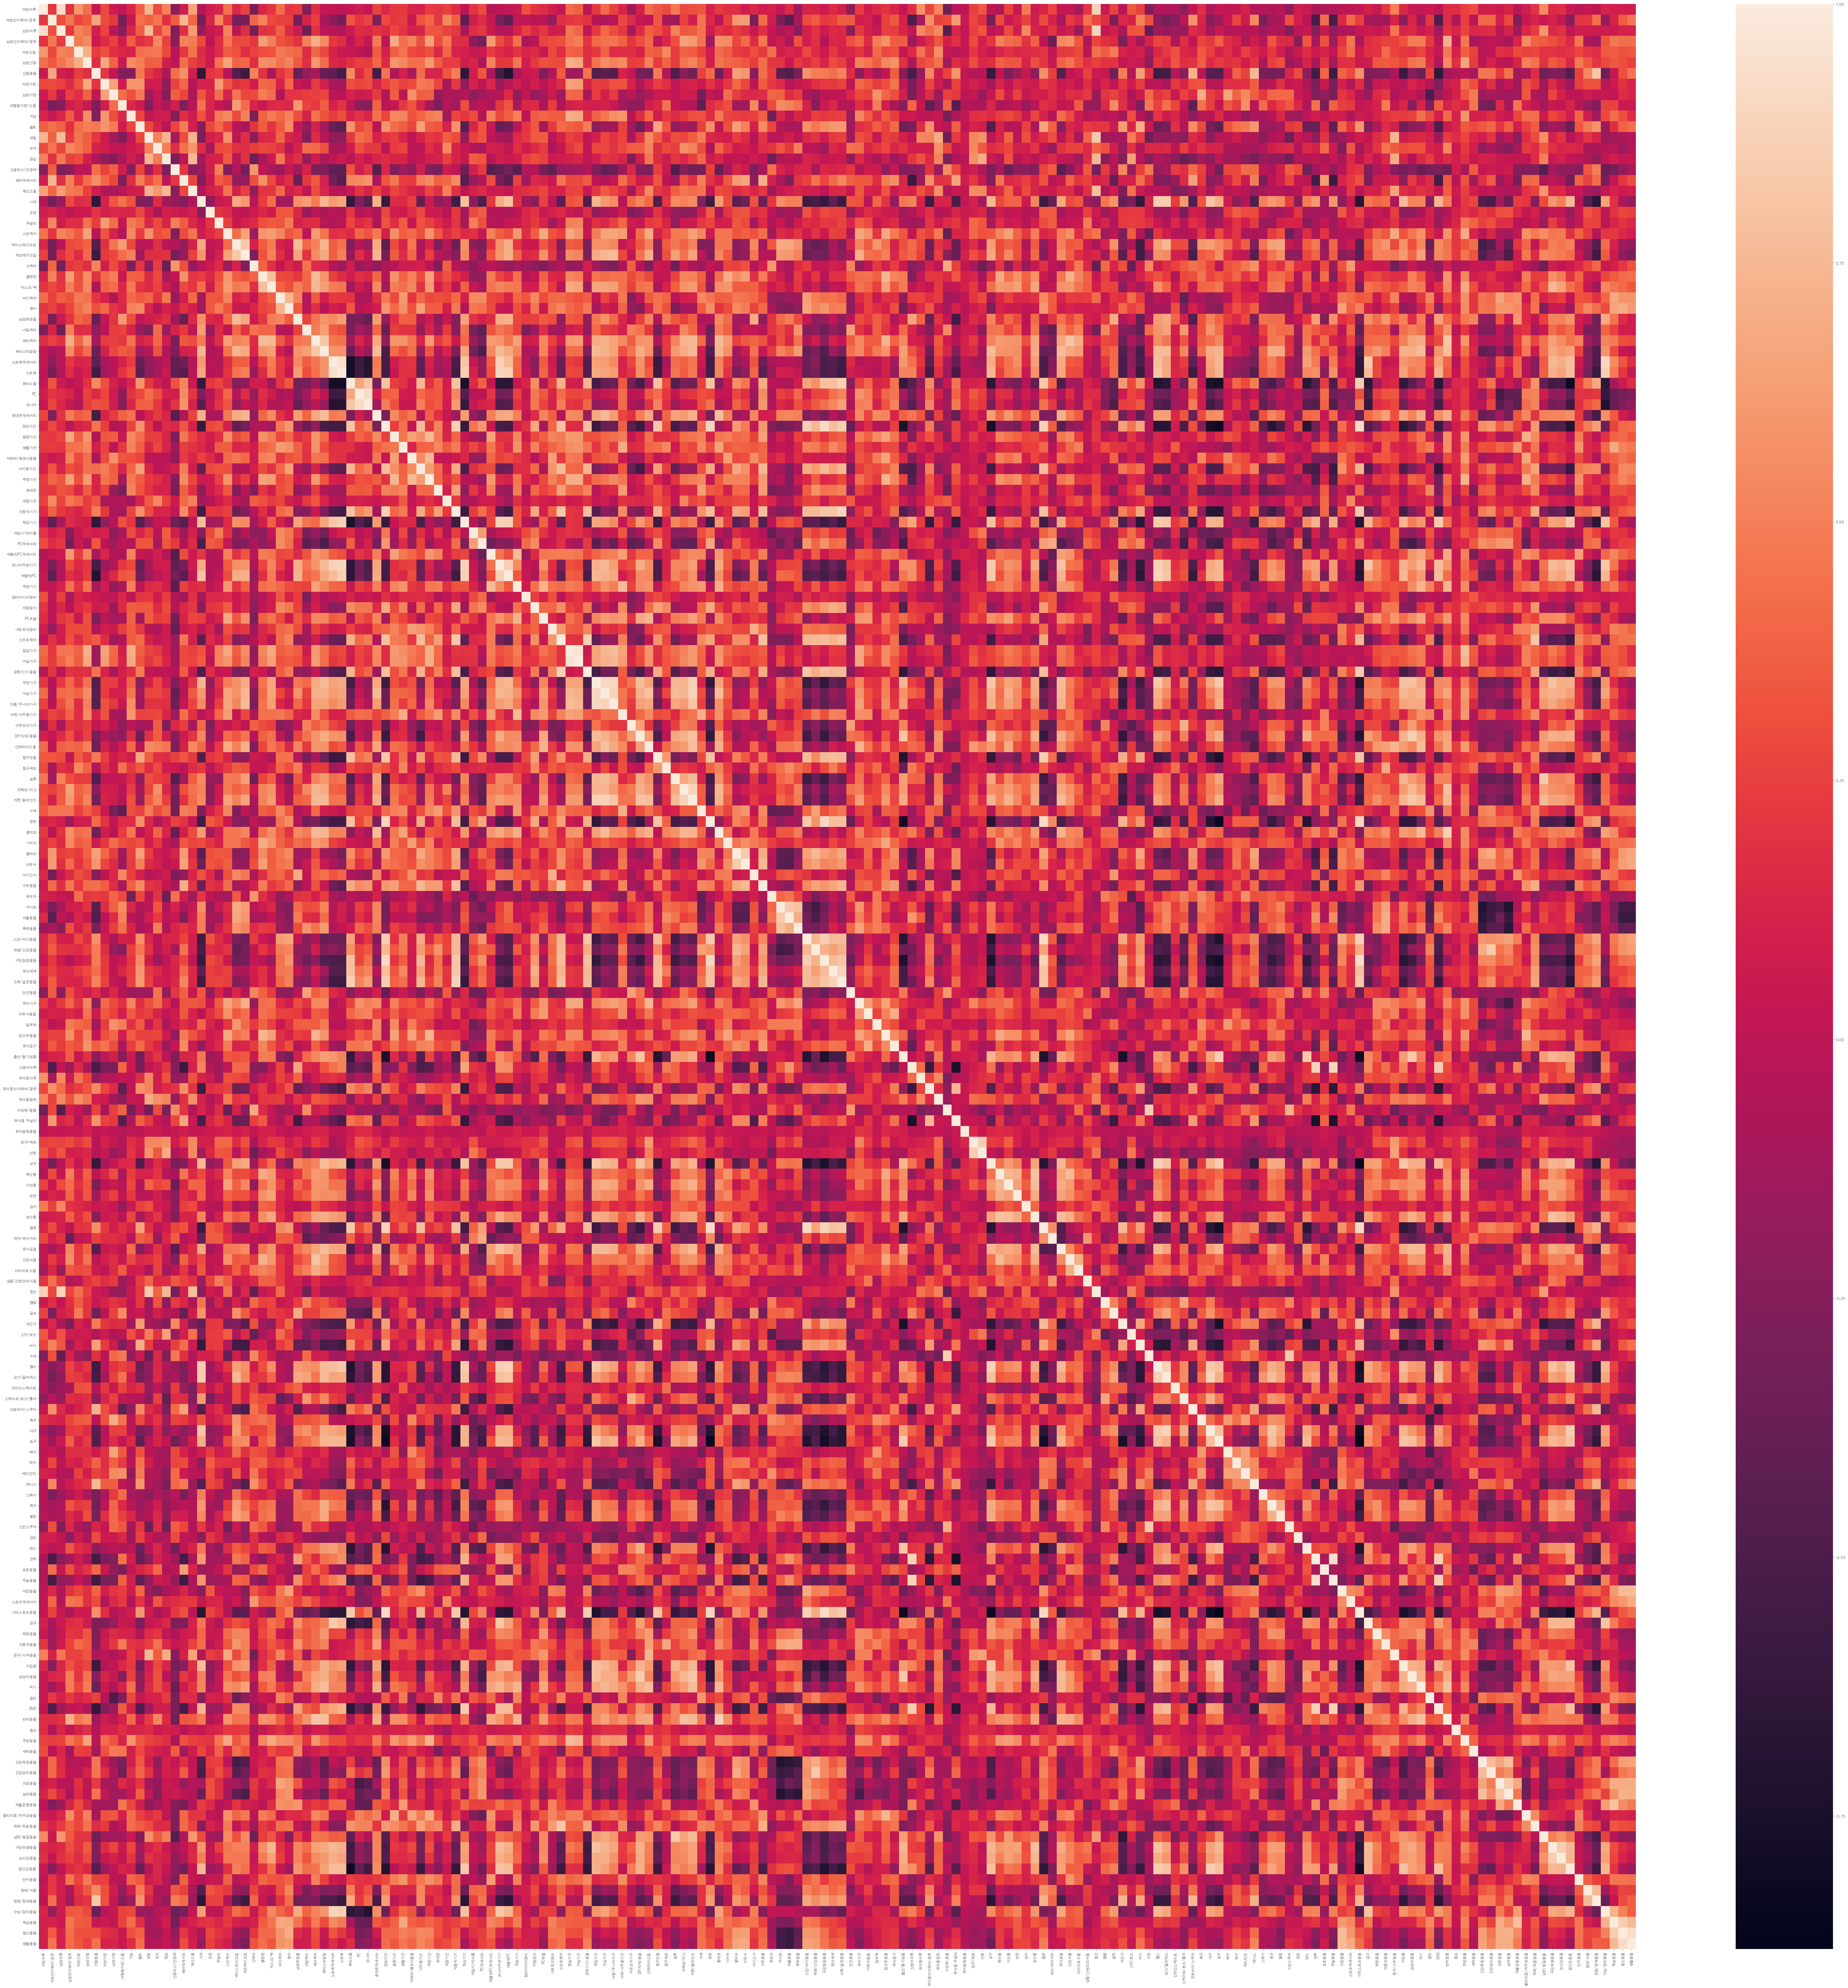

In [11]:
corr = df.corr()
plt.figure(figsize= (100,100))
sns.heatmap(corr)
plt.show()

특성이 너무 많아서 히트맵으로 탐색하기에는 무리가 있음

In [12]:
corr

,여성의류,여성언더웨어/잠옷,남성의류,남성언더웨어/잠옷,여성신발,남성신발,신발용품,여성가방,남성가방,여행용가방/소품,...,구강위생용품,눈건강용품,발건강용품,안마용품,원예/식물,정원/원예용품,수납/정리용품,욕실용품,청소용품,생활용품
여성의류,1.000000,0.216018,0.930887,0.198471,0.589848,0.433575,0.036313,0.282921,0.063954,0.006040,...,0.150842,0.184842,0.045079,-0.010125,0.028289,0.001578,0.126101,0.093558,0.095624,0.084067
여성언더웨어/잠옷,0.216018,1.000000,0.306443,0.469627,0.278804,0.332732,0.667034,0.301444,0.224051,-0.299693,...,0.105316,0.018884,-0.238233,0.202134,0.219389,0.431664,-0.171456,0.114217,0.349913,0.451588
남성의류,0.930887,0.306443,1.000000,0.234461,0.514904,0.452822,0.101418,0.262688,-0.016279,-0.233535,...,0.145618,0.187365,0.004196,0.089886,0.081293,0.069526,0.064784,0.055595,0.112260,0.107035
남성언더웨어/잠옷,0.198471,0.469627,0.234461,1.000000,0.476200,0.549218,0.058974,0.161956,0.248686,0.073434,...,0.307853,0.245797,0.160296,0.461076,-0.064965,-0.131233,0.334580,0.469526,0.428771,0.427350
여성신발,0.589848,0.278804,0.514904,0.476200,1.000000,0.703451,0.240318,0.314988,0.183510,0.139587,...,0.195290,0.177450,0.204097,0.269370,0.199521,0.165214,0.352628,0.360111,0.316824,0.336136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
정원/원예용품,0.001578,0.431664,0.069526,-0.131233,0.165214,0.204065,0.819246,0.313305,0.034783,-0.255512,...,-0.383953,-0.364977,-0.564076,0.252304,0.743598,1.000000,-0.376137,0.030346,0.302792,0.379176
수납/정리용품,0.126101,-0.171456,0.064784,0.334580,0.352628,0.284036,-0.362271,-0.031165,0.042602,0.259679,...,0.671782,0.634100,0.736122,0.171948,-0.132371,-0.376137,1.000000,0.722827,0.502604,0.360239
욕실용품,0.093558,0.114217,0.055595,0.469526,0.360111,0.339822,0.036342,0.066817,0.012460,0.260538,...,0.293112,0.270766,0.199466,0.460334,0.108603,0.030346,0.722827,1.000000,0.848992,0.755317
청소용품,0.095624,0.349913,0.112260,0.428771,0.316824,0.308640,0.309676,0.189319,0.158089,0.051342,...,0.159963,0.113273,-0.062383,0.453193,0.271851,0.302792,0.502604,0.848992,1.000000,0.922136


In [13]:
# 엑셀파일로 저장해준다.
# corr.to_excel('/Users/seheemoon/Downloads/클릭지수_상관계수.xlsx')

In [14]:
# 각각의 열에 대해 상관계수를 내림차순으로 정리하고 각각의 다른 데이터프레임으로 딕셔너리 안에 저장하는 함수
def corr_sort_dict(df):
    sorted_dfs = {}
    corr = df.corr()
    col_lst = list(df.columns)
    
    for col in col_lst:
        value_column_df = corr[[col]].copy()
        sorted_df = value_column_df.sort_values(by=col, ascending=False).reset_index(drop=False)
        # sorted_df = value_column_df.reset_index(drop=False)
        sorted_dfs[col] = sorted_df
        
    return sorted_dfs

sorted_corr_dfs = corr_sort_dict(df)

# 예시로 딕셔너리 안의 '여성언더웨어/잠옷'에 해당하는 데이터프레임을 출력함
desired_corr_df = sorted_corr_dfs['여성언더웨어/잠옷']
desired_corr_df


,index,여성언더웨어/잠옷
0,여성언더웨어/잠옷,1.000000
1,헤어액세서리,0.738593
2,신발용품,0.667034
3,이유식,0.620419
4,유아동 주얼리,0.614628
...,...,...
177,외출용품,-0.445263
178,DVD,-0.490998
179,신생아의류,-0.496884
180,권투,-0.521413


In [15]:
# 각각의 열에 대해 p_value를 각각의 다른 데이터프레임으로 딕셔너리 안에 저장하는 함수
def p_value_sort_dict(df):
    sorted_dfs = {}
    corr_matrix = df.corr()
    col_lst = list(df.columns)
    p_value_matrix = np.zeros_like(corr_matrix)
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if i != j:
                _, p_value_matrix[i, j] = scipy.stats.pearsonr(df.iloc[:, i], df.iloc[:, j])
    p_value_df = pd.DataFrame(p_value_matrix, columns=df.columns, index=df.columns)
    col_lst = list(df.columns)
    
    for col in col_lst:
        value_column_df = p_value_df[[col]].copy()
        sorted_df = value_column_df.reset_index(drop=False)
        sorted_dfs[col] = sorted_df
        
    return sorted_dfs

sorted_p_value_dfs = p_value_sort_dict(df)

# 예시로 딕셔너리 안의 '여성언더웨어/잠옷'에 해당하는 데이터프레임을 출력함
desired_p_value_df = sorted_p_value_dfs['여성언더웨어/잠옷']
desired_p_value_df

,index,여성언더웨어/잠옷
0,여성의류,1.507514e-24
1,여성언더웨어/잠옷,0.000000e+00
2,남성의류,7.397765e-49
3,남성언더웨어/잠옷,1.323180e-120
4,여성신발,2.091711e-40
...,...,...
177,정원/원예용품,3.795134e-100
178,수납/정리용품,6.430513e-16
179,욕실용품,8.285594e-08
180,청소용품,4.013125e-64


In [16]:
# 각각의 열에 대해 상관계수를 나타낸 데이터프레임과 p-value를 나타낸 데이터프레임을 결합해주는 과정
col_lst = list(df.columns)
merge_df_dict = {}
for col in col_lst:
    corr_df = sorted_corr_dfs[col]
    p_value_df = sorted_p_value_dfs[col]
    combined_df = pd.merge(corr_df, p_value_df, on='index', how='left')
    combined_df.columns = ['index', f'{col}_corr', f'{col}_p_value']
    merge_df_dict[col] = combined_df

In [17]:
desired_merge_df = merge_df_dict['여성의류']
desired_merge_df

,index,여성의류_corr,여성의류_p_value
0,여성의류,1.000000,0.000000e+00
1,남성의류,0.930887,0.000000e+00
2,등산,0.863897,0.000000e+00
3,양말,0.732766,0.000000e+00
4,패션소품,0.652661,3.746227e-266
...,...,...,...
177,선글라스/안경테,-0.220694,1.411661e-25
178,네일케어,-0.269872,7.137733e-38
179,수영,-0.275457,1.908920e-39
180,선케어,-0.298934,1.812405e-46


In [18]:
# 완성된 상관계수 ~ p-value 데이터프레임
correlation_df = pd.concat(merge_df_dict.values(), axis=1)
correlation_df

,index,여성의류_corr,여성의류_p_value,index,여성언더웨어/잠옷_corr,여성언더웨어/잠옷_p_value,index,남성의류_corr,남성의류_p_value,index,...,수납/정리용품_p_value,index,욕실용품_corr,욕실용품_p_value,index,청소용품_corr,청소용품_p_value,index,생활용품_corr,생활용품_p_value
0,여성의류,1.000000,0.000000e+00,여성언더웨어/잠옷,1.000000,0.000000e+00,남성의류,1.000000,0.000000e+00,남성언더웨어/잠옷,...,0.000000e+00,욕실용품,1.000000,0.000000e+00,청소용품,1.000000,0.000000e+00,생활용품,1.000000,0.000000e+00
1,남성의류,0.930887,0.000000e+00,헤어액세서리,0.738593,0.000000e+00,여성의류,0.930887,0.000000e+00,반려동물,...,0.000000e+00,청소용품,0.848992,0.000000e+00,생활용품,0.922136,0.000000e+00,청소용품,0.922136,0.000000e+00
2,등산,0.863897,0.000000e+00,신발용품,0.667034,3.914417e-282,등산,0.885968,0.000000e+00,헤어케어,...,0.000000e+00,재활운동용품,0.793951,0.000000e+00,욕실용품,0.848992,0.000000e+00,수련용품,0.759417,0.000000e+00
3,양말,0.732766,0.000000e+00,이유식,0.620419,2.656176e-233,양말,0.760288,0.000000e+00,음향가전,...,0.000000e+00,생활용품,0.755317,0.000000e+00,수련용품,0.759458,0.000000e+00,욕실용품,0.755317,0.000000e+00
4,패션소품,0.652661,3.746227e-266,유아동 주얼리,0.614628,8.391969e-228,패션소품,0.621198,4.745023e-234,카페트/러그,...,0.000000e+00,수납/정리용품,0.722827,0.000000e+00,실버용품,0.714271,0.000000e+00,실버용품,0.705124,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,선글라스/안경테,-0.220694,1.411661e-25,외출용품,-0.445263,3.529277e-107,선글라스/안경테,-0.270150,5.974391e-38,검도,...,7.816511e-110,카시트,-0.285641,2.074740e-42,모니터,-0.272410,1.391831e-38,DVD,-0.320777,1.286479e-53
178,네일케어,-0.269872,7.137733e-38,DVD,-0.490998,2.599496e-133,선케어,-0.324406,7.281570e-55,선글라스/안경테,...,7.156821e-112,외출용품,-0.298305,2.852960e-46,PC,-0.315266,9.341083e-52,교구,-0.361565,1.194851e-68
179,수영,-0.275457,1.908920e-39,신생아의류,-0.496884,5.677950e-137,네일케어,-0.352209,5.329362e-65,자전거,...,5.247715e-213,선글라스/안경테,-0.317223,2.060218e-52,목욕용품,-0.422192,1.949932e-95,목욕용품,-0.385853,1.041536e-78
180,선케어,-0.298934,1.812405e-46,권투,-0.521413,5.023366e-153,수영,-0.397182,1.059439e-83,PC액세서리,...,9.092044e-270,PC,-0.373022,2.749676e-73,카시트,-0.540133,3.403916e-166,카시트,-0.545433,4.473949e-170


In [19]:
엑셀파일로 저장해준다.
correlation_df.to_excel('/Users/seheemoon/Downloads/클릭지수_상관계수-pvalue_내림차순정렬.xlsx')

 df.corr() 함수는 기본적으로 피어슨(Pearson) 상관계수를 계산하여 반환합니다. 피어슨 상관계수는 두 변수 간의 선형 상관관계를 측정하는 지표입니다. 선형 상관관계란 두 변수가 일정한 비율로 변화하는 관계를 의미하며, 피어슨 상관계수는 이러한 선형 관계의 정도와 방향성을 나타냅니다.

피어슨 상관계수는 다음과 같이 계산됩니다:

피어슨 상관계수 = (공분산) / (표준편차1×표준편차2)
​
 

여기서 공분산은 두 변수의 곱의 평균에서 두 변수의 평균의 곱을 뺀 값이며, 표준편차1과 표준편차2는 각 변수의 표준편차입니다.

피어슨 상관계수의 값은 -1부터 1까지의 범위를 가지며, 다음과 같은 의미를 가집니다:

- 1에 가까울수록 양의 선형 상관관계가 강함을 나타냅니다. (한 변수가 증가할 때 다른 변수도 증가)
- -1에 가까울수록 음의 선형 상관관계가 강함을 나타냅니다. (한 변수가 증가할 때 다른 변수는 감소)
- 0에 가까울수록 선형 상관관계가 약하거나 없음을 나타냅니다.
피어슨 상관계수는 주로 선형적인 관계를 파악하고, 변수들 간의 상호작용을 분석하는 데 사용됩니다.


다양한 종류의 상관계수가 있으며, 각각의 상관계수는 데이터의 특성에 따라 적절하게 선택되어야 합니다. 다음은 일반적으로 사용되는 몇 가지 상관계수와 그 특징을 설명합니다:

1. 피어슨(Pearson) 상관계수:

- 선형 상관관계를 측정하는 가장 일반적인 상관계수입니다.
- -1부터 1까지의 범위를 가지며, 1에 가까울수록 양의 선형 상관관계가 강하고, -1에 가까울수록 음의 선형 상관관계가 강합니다.
- 0에 가까울수록 선형 상관관계가 약하거나 없음을 나타냅니다.
- 연속형 변수 간의 상관관계를 분석할 때 사용됩니다.
- 이상치(outlier)에 민감할 수 있습니다.

2. 스피어만(Spearman) 상관계수:

- 서열형(순위) 변수 간의 상관관계를 측정하는 상관계수입니다.
- 피어슨 상관계수와 달리 비선형 상관관계도 감지할 수 있습니다.
- -1부터 1까지의 범위를 가지며, 부호만을 나타내는 경우가 많습니다.
- 이상치에 덜 민감하고, 비모수적인 방법으로 상관관계를 계산합니다.

3. 켄달(Kendall) 상관계수:

- 서열형(순위) 변수 간의 상관관계를 측정하는 상관계수입니다.
- 스피어만 상관계수와 마찬가지로 비선형 상관관계를 감지할 수 있습니다.
- -1부터 1까지의 범위를 가지며, 부호만을 나타내는 경우가 많습니다.
- 켄달 상관계수는 데이터 크기가 큰 경우 계산이 느릴 수 있습니다.

4. 범주형 상관계수(Cramer's V, Phi 등):

- 범주형 변수 간의 상관관계를 측정하는 상관계수입니다.
- 이진 데이터 또는 카테고리 데이터에서 사용됩니다.
- 범주형 변수 간의 연관성을 파악하는 데 유용합니다.

5. 점별 이분 상관계수(Point-Biserial Correlation Coefficient):

- 이진(binary) 변수와 연속형 변수 간의 상관관계를 측정하는 상관계수입니다.
- 이진 변수가 0 또는 1인 경우와 연속형 변수 간의 상관성을 분석할 때 사용됩니다.

피어슨 상관계수를 선택하는 것이 이 데이터셋에는 적절하다 판단되어 default값으로 그대로 진행함.

피어슨 상관계수의 유의미함을 판단하는 데에는 일반적으로 다음과 같은 기준을 사용합니다:

1. 상관계수의 절대값 크기:

- 상관계수의 절대값이 0.1 미만이면 매우 약한 상관관계
- 0.1 이상 0.3 미만이면 약한 상관관계
- 0.3 이상 0.5 미만이면 중간 정도의 상관관계
- 0.5 이상 0.7 미만이면 뚜렷한 상관관계
- 0.7 이상이면 매우 강한 상관관계

2. 유의확률(p-value):

- 피어슨 상관계수의 유의확률(p-value)은 상관관계가 우연에 의한 것인지 아니면 통계적으로 유의미한지를 판단하는 지표입니다.
- 일반적으로 유의확률이 0.05(5%) 이하일 경우에는 상관관계가 통계적으로 유의미하다고 판단합니다.
- 유의확률이 작을수록 상관계수의 신뢰성이 높아집니다.

3. 데이터의 크기:

- 상관계수의 유의미함은 데이터의 크기에 영향을 받습니다.
- 작은 샘플 크기에서는 작은 상관계수도 통계적으로 유의미할 수 있습니다.
- 큰 샘플 크기에서는 상대적으로 작은 상관계수도 유의미하지 않을 수 있습니다.

상황에 따라서는 상관계수의 크기와 유의확률을 함께 고려하여 판단하는 것이 좋습니다. 또한, 상관계수만으로 데이터의 관계를 해석하는 것보다 다른 분석 방법과 함께 고려하는 것이 더 정확한 결론을 도출하는데 도움이 될 수 있습니다.